# Project - Wrangle and Analyze Data 

# WeRateDogs 


## Gathering Data

In [20]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sbs
import tweepy
import json

**Note: I used the ready tweet-json.txt file. However, I applied to the twitter developer account as instructed, I got a reject. Below you can see the e-mail note from Twitter.**

**Your Twitter developer account application was not approved.
Thank you for your interest in developer access. We are unable to serve your use case at this time.**

**Thank you for your interest in building on Twitter.**

In [72]:
# Read twitter-archive-enhanced.csv file
twitter = pd.read_csv('twitter-archive-enhanced.csv')
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [22]:
# Read image-predictions.tsv file 
image = pd.read_csv('image-predictions.tsv', sep='\t')
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [23]:
# Read tweet-json.txt file 
tweet = pd.read_json('tweet-json.txt', lines = True, encoding='utf-8')
tweet

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assessing Data 

#### Table `twitter`

In [26]:
twitter.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1448,696405997980676096,NaN,NaN,2016-02-07 18:51:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Berb. He just found out that they have...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696405997...,7,10,Berb,None,None,None,None
1668,682638830361513985,NaN,NaN,2015-12-31 19:05:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have no words. Just a magnificent pup. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682638830...,12,10,None,None,None,None,None
1582,687109925361856513,NaN,NaN,2016-01-13 03:12:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Baxter. He looks like a fun dog. Prefe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687109925...,11,10,Baxter,None,None,None,None


In [27]:
twitter.shape

(2356, 17)

In [73]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [30]:
twitter.duplicated().sum()

0

In [32]:
twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [33]:
list(twitter)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [51]:
twitter.query('rating_denominator != 10')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [53]:
twitter.query('rating_denominator != 10').count()

tweet_id                      23
in_reply_to_status_id          5
in_reply_to_user_id            5
timestamp                     23
source                        23
text                          23
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

In [49]:
twitter.query('rating_numerator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None
2324,666421158376562688,NaN,NaN,2015-11-17 01:02:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*internally screaming* 12/10 https://t.co/YMcr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666421158...,12,10,None,None,None,None,None
2329,666373753744588802,NaN,NaN,2015-11-16 21:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Those are sunglasses and a jean jacket. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666373753...,11,10,None,None,None,None,None
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None


In [34]:
image.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1261,748932637671223296,https://pbs.twimg.com/media/CmS-QkQWAAAkUa-.jpg,1,borzoi,0.742912,True,wire-haired_fox_terrier,0.204082,True,English_setter,0.021032,True
1685,814530161257443328,https://pbs.twimg.com/media/C03K2-VWIAAK1iV.jpg,1,miniature_poodle,0.626913,True,toy_poodle,0.265582,True,soft-coated_wheaten_terrier,0.041614,True
906,700167517596164096,https://pbs.twimg.com/media/Cbd-o8hWwAE4OFm.jpg,1,beagle,0.162585,True,Pembroke,0.120481,True,Siberian_husky,0.110284,True


In [35]:
image.shape

(2075, 12)

In [36]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [39]:
image.duplicated().sum()

0

In [56]:
image.query('tweet_id == 748932637671223296')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1261,748932637671223296,https://pbs.twimg.com/media/CmS-QkQWAAAkUa-.jpg,1,borzoi,0.742912,True,wire-haired_fox_terrier,0.204082,True,English_setter,0.021032,True


In [60]:
list(image.p1)

['Welsh_springer_spaniel',
 'redbone',
 'German_shepherd',
 'Rhodesian_ridgeback',
 'miniature_pinscher',
 'Bernese_mountain_dog',
 'box_turtle',
 'chow',
 'shopping_cart',
 'miniature_poodle',
 'golden_retriever',
 'Gordon_setter',
 'Walker_hound',
 'pug',
 'bloodhound',
 'Lhasa',
 'English_setter',
 'hen',
 'desktop_computer',
 'Italian_greyhound',
 'Maltese_dog',
 'three-toed_sloth',
 'ox',
 'golden_retriever',
 'malamute',
 'guinea_pig',
 'soft-coated_wheaten_terrier',
 'Chihuahua',
 'black-and-tan_coonhound',
 'coho',
 'toy_terrier',
 'Blenheim_spaniel',
 'Pembroke',
 'llama',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'curly-coated_retriever',
 'dalmatian',
 'Ibizan_hound',
 'Border_collie',
 'German_shepherd',
 'Labrador_retriever',
 'miniature_poodle',
 'seat_belt',
 'Italian_greyhound',
 'snail',
 'English_setter',
 'miniature_schnauzer',
 'Maltese_dog',
 'Airedale',
 'triceratops',
 'swab',
 'hay',
 'hyena',
 'golden_retriever',
 'Chesapeake_Bay_retriever',
 'jigsaw_puzzle',

In [61]:
list(image.p2)

['collie',
 'miniature_pinscher',
 'malinois',
 'redbone',
 'Rottweiler',
 'English_springer',
 'mud_turtle',
 'Tibetan_mastiff',
 'shopping_basket',
 'komondor',
 'Tibetan_mastiff',
 'Yorkshire_terrier',
 'English_foxhound',
 'bull_mastiff',
 'German_shepherd',
 'Shih-Tzu',
 'Newfoundland',
 'cock',
 'desk',
 'toy_terrier',
 'toy_poodle',
 'otter',
 'Newfoundland',
 'Chesapeake_Bay_retriever',
 'Siberian_husky',
 'skunk',
 'Afghan_hound',
 'toy_terrier',
 'bloodhound',
 'barracouta',
 'papillon',
 'cocker_spaniel',
 'chow',
 'Irish_terrier',
 'chain_saw',
 'beagle',
 'giant_schnauzer',
 'Labrador_retriever',
 'Pembroke',
 'English_springer',
 'beagle',
 'Chihuahua',
 'cocker_spaniel',
 'miniature_pinscher',
 'Weimaraner',
 'slug',
 'Brittany_spaniel',
 'standard_schnauzer',
 'teddy',
 'toy_poodle',
 'armadillo',
 'chain_saw',
 'Rottweiler',
 'African_hunting_dog',
 'Labrador_retriever',
 'vizsla',
 'doormat',
 'pug',
 'Italian_greyhound',
 'Chihuahua',
 'Samoyed',
 'Pomeranian',
 'min

In [62]:
list(image.p3)

['Shetland_sheepdog',
 'Rhodesian_ridgeback',
 'bloodhound',
 'miniature_pinscher',
 'Doberman',
 'Greater_Swiss_Mountain_dog',
 'terrapin',
 'fur_coat',
 'golden_retriever',
 'soft-coated_wheaten_terrier',
 'Labrador_retriever',
 'Pekinese',
 'Ibizan_hound',
 'French_bulldog',
 'malinois',
 'Dandie_Dinmont',
 'borzoi',
 'partridge',
 'bookcase',
 'basenji',
 'miniature_poodle',
 'great_grey_owl',
 'groenendael',
 'Labrador_retriever',
 'Eskimo_dog',
 'hamster',
 'briard',
 'papillon',
 'flat-coated_retriever',
 'gar',
 'Chihuahua',
 'Shih-Tzu',
 'Pomeranian',
 'dingo',
 'power_drill',
 'Saluki',
 'Labrador_retriever',
 'Great_Pyrenees',
 'West_Highland_white_terrier',
 'collie',
 'bloodhound',
 'French_bulldog',
 'toy_poodle',
 'Chihuahua',
 'vizsla',
 'acorn',
 'Ibizan_hound',
 'giant_schnauzer',
 'West_Highland_white_terrier',
 'teddy',
 'common_iguana',
 'wig',
 'water_buffalo',
 'coyote',
 'seat_belt',
 'kelpie',
 'space_heater',
 'Brabancon_griffon',
 'Pomeranian',
 'toy_poodle',

In [40]:
tweet.sample(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
837,2016-08-21 02:47:37+00:00,767191397493538821,767191397493538816,I don't know any of the backstory behind this ...,False,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 767191392800108546, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,13643,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1973,2015-12-05 04:36:04+00:00,672997845381865473,672997845381865472,Say hello to Kenzie. She is a fluff ball. 12/1...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672997838817796096, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2092,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2038,2015-12-01 04:22:29+00:00,671544874165002241,671544874165002240,Interesting dog here. Very large. Purple. Mani...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671544869609857024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2126,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [57]:
tweet.query('id == 748932637671223296')

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
987,2016-07-01 17:33:49+00:00,748932637671223296,748932637671223296,Say hello to Divine Doggo. Must be magical af....,False,"[0, 77]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 748932629869756416, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,6461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [59]:
twitter.query('tweet_id == 748932637671223296')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
989,748932637671223296,NaN,NaN,2016-07-01 17:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Divine Doggo. Must be magical af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748932637...,13,10,Divine,doggo,None,None,None


In [41]:
tweet.shape

(2354, 31)

In [42]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [43]:
tweet.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [45]:
tweet.id.duplicated().sum()

0

In [46]:
all_columns = pd.Series(list(twitter) + list(image) + list(tweet))
all_columns[all_columns.duplicated()]

17                 tweet_id
37                   source
38    in_reply_to_status_id
40      in_reply_to_user_id
dtype: object

In [47]:
tweet.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

### Quality Issues  

#### Table `twitter`

- Wrong data types: timestamp, retweeted_status_timestamp are object, not datetime64 
- Missing data (in_reply_to_status_id,  in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
- Missing names, nulls represented as 'a' instead of real ones in the name column
- Missing information, nulls represented as 'none' in columns such as doggo, floofer, pupper, puppo. 
- There are 23 rows which contains rating_denominators is not equal 10. 

#### Table `image` 

- Incomprehensible column names (p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog)
- There are several names assigned to the dogs (p1, p2, p3) which are not dog names, such as hen(p3), toilet_tissue(p3), computer(p1), paper_towel(p2), and so on
- There is not standard form of writing the predictions in p1, p2, p3. Lower or upper cases, underlines and so on


#### Table `tweet`

- Missing values (extended_entities, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, geo, coordinates, place, contributors, possibly_sensitive, possibly_sensitive_appealable, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status)



### Tidiness Issues


#### Table `twitter`

- tweet_id column in `twitter` table duplicated in `image`
- source, in_reply_to_status_id and in_reply_to_user_id columns in `twitter` table duplicated in `tweet`
- there are unneeded columns 
- date and time are under one variable - timestamps 

#### Table `image` 

- tweet_id in `twitter` and `image` tables are matching with the id column in `tweet` table and can be merged after renaming the id column to tweet_id columns in `tweet` table


#### Table `tweet`

- id and full_text columns in `tweet` table are matching with the tweet_id and text columns in `twitter` table
- there are unneeded columns 
- date and time are under one variable - created_at 


## Cleaning Data 

### Quality Issues  

#### Table `twitter`

- Wrong data types: timestamp, retweeted_status_timestamp are object, not datetime64 

#### Define 

Convert object to datetime64 data type 

#### Code 

In [74]:
# Convert to the datetime64
twitter['timestamp'] = pd.to_datetime(twitter['timestamp'])

#### Test 

In [75]:
# Check the result
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

- Missing data (in_reply_to_status_id,  in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)

#### Define 

Drop these variables, as I will not use them in my analysis. 

#### Code 

In [76]:
# Created deleted columns list and drop them

deleted_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls']
twitter.drop(deleted_columns, axis = 1, inplace = True)

#### Test 

In [77]:
# Check the result
twitter.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


- Missing names, nulls represented as 'a' instead of real ones in the name column
- Missing information, nulls represnted as 'none' in columns such as doggo, floofer, pupper, puppo.

#### Define 
Replace a and none with Nan in those columns and then drop. Before dropping check the count of the null values. If sum is higher, rather than dropping nulls, drop the columns. 

#### Code

In [81]:
# Replace 'None' with null values
twitter[['doggo','floofer', 'pupper', 'puppo']] = twitter[['doggo','floofer', 'pupper', 'puppo']].replace('None', np.NAN)

In [83]:
# Check the result
twitter.doggo.isnull().sum()

2259

In [84]:
# Check the result
twitter.floofer.isnull().sum()

2346

In [85]:
# Check the result
twitter.pupper.isnull().sum()

2099

In [86]:
# Check the result
twitter.puppo.isnull().sum()

2326

In [88]:
# Drop the columns 
dropped_columns = ['doggo','floofer', 'pupper', 'puppo', 'name']
twitter.drop(dropped_columns, axis = 1, inplace = True)

#### Test 

In [89]:
# Check the result
twitter.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10


- There are 23 rows which contains rating_denominator is not equal 10.

#### Define 

Collect the index of those rows in a list, then drop those rows. 

#### Code 

In [95]:
# Create list of the indeces where the rating denominator is not 10
deleted_rows = []

for i in twitter.query('rating_denominator != 10').index:
    deleted_rows.append(i)
    
print(deleted_rows)

[313, 342, 433, 516, 784, 902, 1068, 1120, 1165, 1202, 1228, 1254, 1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843, 2335]


In [100]:
# Drop the rows 
twitter = twitter.drop(labels = deleted_rows, axis = 0)

#### Test

In [102]:
# Check the result 
twitter.query('rating_denominator != 10').count()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
dtype: int64

#### Table `image` 

- Incomprehensible column names (p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog)



#### Define
Rename the columns with more descriptive names.

#### Code

In [107]:
# Rename the columns with descriptive names
image_up = image.rename(columns = {'p1': 'predict_1', 'p2': 'predict_2', 'p3': 'predict_3', 
                        'p1_conf': 'predict_1_confidence', 'p2_conf': 'predict_2_confidence', 'p3_conf': 'predict_3_confidence', 
                        'p1_dog': 'predict_1_dog', 'p2_dog': 'predict_2_dog', 'p3_dog': 'predict_3_dog'})

#### Test

In [108]:
# Check the result
image_up.head()

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


- There is not standard form of writing the predictions in p1, p2, p3. Lower or upper cases, underscore and so on


#### Define
Make all the prediction lowercase, and then replace _ with white space. 

#### Code

In [125]:
# Make all the records lower case 
image_up['predict_1'] = image_up['predict_1'].str.lower()
image_up['predict_2'] = image_up['predict_2'].str.lower()
image_up['predict_3'] = image_up['predict_3'].str.lower()

#### Test

In [126]:
# Check the results 
image_up.sample(20)

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
1998,875144289856114688,https://pbs.twimg.com/ext_tw_video_thumb/87514...,1,siberian_husky,0.245048,True,pembroke,0.223716,True,dingo,0.160753,False
1517,787322443945877504,https://pbs.twimg.com/media/Cu0hlfwWYAEdnXO.jpg,1,seat_belt,0.747739,False,golden_retriever,0.105703,True,dingo,0.017257,False
1744,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,pembroke,0.966327,True,cardigan,0.027356,True,basenji,0.004633,True
921,701981390485725185,https://pbs.twimg.com/media/Cb3wWWbWEAAy06k.jpg,1,pomeranian,0.491022,True,weasel,0.130879,False,yorkshire_terrier,0.099241,True
853,696405997980676096,https://pbs.twimg.com/media/Caohi_hWcAAQCni.jpg,1,borzoi,0.132845,True,walker_hound,0.086005,True,great_pyrenees,0.065582,True
400,673688752737402881,https://pbs.twimg.com/media/CVlsVs3WIAAja6m.jpg,1,soft-coated_wheaten_terrier,0.340806,True,sealyham_terrier,0.234898,True,kuvasz,0.203495,True
980,707315916783140866,https://pbs.twimg.com/media/CdDkEkHWwAAAeUJ.jpg,2,bernese_mountain_dog,0.979235,True,shetland_sheepdog,0.011037,True,appenzeller,0.003971,True
274,670833812859932673,https://pbs.twimg.com/media/CU9HyzSWIAAVcte.jpg,1,pekinese,0.609853,True,persian_cat,0.265442,False,japanese_spaniel,0.027460,True
1789,829878982036299777,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,labrador_retriever,0.337053,True,tennis_ball,0.008554,False


#### Code

In [130]:
# Replace all '_' with the white space ' '.
image_up.predict_1 = image_up.predict_1.replace('_', ' ', regex=True)
image_up.predict_2 = image_up.predict_2.replace('_', ' ', regex=True)
image_up.predict_3 = image_up.predict_3.replace('_', ' ', regex=True)

#### Test 

In [131]:
# Check the results 
image_up.predict_1

0       welsh springer spaniel
1                      redbone
2              german shepherd
3          rhodesian ridgeback
4           miniature pinscher
                 ...          
2070                    basset
2071               paper towel
2072                 chihuahua
2073                 chihuahua
2074                    orange
Name: predict_1, Length: 2075, dtype: object

In [134]:
image_up.predict_2

0                   collie
1       miniature pinscher
2                 malinois
3                  redbone
4               rottweiler
               ...        
2070      english springer
2071    labrador retriever
2072              malamute
2073              pekinese
2074                 bagel
Name: predict_2, Length: 2075, dtype: object

In [135]:
image_up.predict_3

0                 shetland sheepdog
1               rhodesian ridgeback
2                        bloodhound
3                miniature pinscher
4                          doberman
                   ...             
2070    german short-haired pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: predict_3, Length: 2075, dtype: object

In [136]:
# Check results 
image_up.sample(20)

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
770,689289219123089408,https://pbs.twimg.com/ext_tw_video_thumb/68928...,1,snowmobile,0.254642,False,assault rifle,0.129558,False,rifle,0.110875,False
979,707297311098011648,https://pbs.twimg.com/media/CdDTJLMW4AEST--.jpg,1,blenheim spaniel,0.370717,True,shih-tzu,0.201566,True,black-footed ferret,0.101559,False
896,699691744225525762,https://pbs.twimg.com/media/CbXN7aPWIAE0Xt1.jpg,1,hippopotamus,0.982269,False,sea lion,0.006295,False,dugong,0.005768,False
150,668641109086707712,https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg,1,vacuum,0.432594,False,pug,0.146311,True,toilet tissue,0.024500,False
1535,790337589677002753,https://pbs.twimg.com/media/CvfX2AnWYAAQTay.jpg,1,pembroke,0.658808,True,cardigan,0.153096,True,toy terrier,0.102299,True
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,saint bernard,0.995143,True,cardigan,0.003044,True,english springer,0.001050,True
686,684097758874210310,https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg,1,labrador retriever,0.627856,True,german short-haired pointer,0.173675,True,chesapeake bay retriever,0.041342,True
1570,794926597468000259,https://pbs.twimg.com/media/CwglhZVXgAAc3_w.jpg,1,teddy,0.569566,False,bath towel,0.173745,False,toy poodle,0.037662,True
1352,759923798737051648,https://pbs.twimg.com/media/CovKqSYVIAAUbUW.jpg,1,labrador retriever,0.324579,True,seat belt,0.109168,False,pug,0.102466,True
359,672622327801233409,https://pbs.twimg.com/media/CVWicBbUYAIomjC.jpg,1,golden retriever,0.952773,True,labrador retriever,0.010835,True,clumber,0.008786,True


- There are several names assigned to the dogs (p1, p2, p3) which are not dog names, such as hen(p3), toilet_tissue(p3), computer(p1), paper_towel(p2), and so on

#### Define 
Find possible predictions which are not dog names and then check the images to see it is a dog or not. If it is not a dog image, drop the row. I want to focus on only the predict_1. 

#### Code 

In [141]:
image_up.shape

(2075, 12)

In [144]:
image_up.predict_1.nunique()

378

In [145]:
# Find the goose typed rows
image_up.query('predict_1 == "goose"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
78,667443425659232256,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False
281,671122204919246848,https://pbs.twimg.com/media/CVBOFTLWwAAzlNi.jpg,1,goose,0.351957,False,chihuahua,0.101228,True,hen,0.065818,False
1038,712065007010385924,https://pbs.twimg.com/media/CeHDV73W0AM5Cf8.jpg,1,goose,0.214301,False,gibbon,0.084253,False,pizza,0.080168,False
1300,752660715232722944,https://pbs.twimg.com/media/CnH87L6XYAAF7I_.jpg,2,goose,0.339324,False,english setter,0.050512,True,basset,0.049093,True


78, 281, 1038 number rows are not dog photos. I can drop them. 

In [146]:
image_up.query('predict_1 == "hen"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
307,671533943490011136,https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg,1,hen,0.556524,False,cock,0.442033,False,black swan,0.001181,False


17 and 307 are not dog photos

In [147]:
image_up.query('predict_1 == "shopping cart"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,7.958960e-03,True
703,684914660081053696,https://pbs.twimg.com/media/CYFOP6cWEAAWp-k.jpg,1,shopping cart,0.460950,False,chow,0.261288,True,labrador retriever,7.419380e-02,True
1432,773308824254029826,https://pbs.twimg.com/media/CrtYRMEWIAAUkCl.jpg,1,shopping cart,0.572349,False,labrador retriever,0.151406,True,shopping basket,1.071020e-01,False
1760,825876512159186944,https://pbs.twimg.com/media/C3YaSnQWAAILgz0.jpg,1,shopping cart,0.995941,False,shopping basket,0.004057,False,mousetrap,8.832830e-07,False
1834,836989968035819520,https://pbs.twimg.com/media/C52V7PzWcAA_pVv.jpg,1,shopping cart,0.572422,False,shopping basket,0.414002,False,toy poodle,5.887300e-03,True


These are all dog photos

In [148]:
image_up.query('predict_1 == "desktop computer"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop computer,0.086502,False,desk,0.085547,False,bookcase,0.07948,False


It is a dog photo.

In [149]:
image_up.query('predict_1 == "seat belt"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat belt,0.375057,False,miniature pinscher,0.167175,True,chihuahua,0.086951,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat belt,0.200373,False,miniature pinscher,0.106003,True,schipperke,0.104733,True
198,669625907762618368,https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg,1,seat belt,0.874502,False,golden retriever,0.055408,True,labrador retriever,0.026854,True
235,670427002554466305,https://pbs.twimg.com/media/CU3VzVwWwAAAsst.jpg,1,seat belt,0.952258,False,toy terrier,0.038872,True,beagle,0.003226,True
522,676582956622721024,https://pbs.twimg.com/media/CWO0m8tUwAAB901.jpg,1,seat belt,0.790028,False,boston bull,0.196307,True,french bulldog,0.012429,True
551,677557565589463040,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,1,seat belt,0.277257,False,shih-tzu,0.249017,True,pekinese,0.209213,True
577,678740035362037760,https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg,1,seat belt,0.787164,False,sunglasses,0.045739,False,beagle,0.022525,True
642,681339448655802368,https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg,1,seat belt,0.532441,False,labrador retriever,0.094615,True,kuvasz,0.089863,True
657,682303737705140231,https://pbs.twimg.com/media/CXgHoLnWAAA8i52.jpg,1,seat belt,0.997659,False,lakeland terrier,0.001731,True,airedale,0.000204,True
740,687312378585812992,https://pbs.twimg.com/media/CYnS9VWW8AAeR8m.jpg,1,seat belt,0.703561,False,great dane,0.139909,True,weimaraner,0.021112,True


As the list are numerous, I only check the where all prediction_1_2_3_dog are False. 843, all predictions are false. 

In [156]:
image_up.query('predict_1 == "snail"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,0.000055,False,acorn,0.000026,False
215,670055038660800512,https://pbs.twimg.com/media/CUyDgChWUAAmNSI.jpg,1,snail,0.563631,False,slug,0.296649,False,bolete,0.031839,False


45 and 215 are not dog photos. 

In [157]:
image_up.query('predict_1 == "candle"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
195,669583744538451968,https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg,1,candle,0.174315,False,lampshade,0.120407,False,plunger,0.072099,False


195 is not a dog photo.

In [158]:
image_up.query('predict_1 == "shopping basket"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
132,668466899341221888,https://pbs.twimg.com/media/CUbfGbbWoAApZth.jpg,1,shopping basket,0.398361,False,hamper,0.363222,False,bassinet,0.084173,False


It is a dog photo.

In [159]:
image_up.query('predict_1 == "ox"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,newfoundland,0.278407,True,groenendael,0.102643,True
145,668625577880875008,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,1,ox,0.071536,False,groenendael,0.054455,True,angora,0.045028,False
390,673363615379013632,https://pbs.twimg.com/media/CVhEoq4WcAE8pBm.jpg,1,ox,0.193431,False,warthog,0.123827,False,bison,0.111177,False
1258,748692773788876800,https://pbs.twimg.com/media/CmPkGhFXEAABO1n.jpg,1,ox,0.337871,False,plow,0.269287,False,oxcart,0.245653,False
1818,834167344700198914,https://pbs.twimg.com/media/C5OOxY6WAAAxERz.jpg,1,ox,0.991682,False,bison,0.005335,False,water buffalo,0.001130,False


1818 is not a dog.

In [160]:
image_up.query('predict_1 == "comic book"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
174,669015743032369152,https://pbs.twimg.com/media/CUjSRNCXAAQ6Y_8.jpg,1,comic book,0.275927,False,bib,0.173516,False,jersey,0.073911,False
1037,711998809858043904,https://pbs.twimg.com/tweet_video_thumb/CeGGkW...,1,comic book,0.105171,False,kuvasz,0.059895,True,book jacket,0.046638,False
1975,870063196459192321,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,1,comic book,0.534409,False,envelope,0.280722,False,book jacket,0.043785,False


Dog photos in the comics books. I will keep them. 

In [161]:
image_up.query('predict_1 == "swab"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain saw,0.190142,False,wig,0.03451,False


It is a dog

In [162]:
image_up.query('predict_1 == "hay"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,rottweiler,0.06249,True,water buffalo,0.048425,False


It is a dog.

In [163]:
image_up.query('predict_1 == "hyena"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,african hunting dog,0.012601,False,coyote,0.000057,False
1826,835264098648616962,https://pbs.twimg.com/media/C5d0QtvXMAI_7uz.jpg,2,hyena,0.736871,False,chesapeake bay retriever,0.087503,True,meerkat,0.042058,False


53 is not a dog photo.

In [164]:
image_up.query('predict_1 == "jigsaw puzzle"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
56,667065535570550784,https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg,1,jigsaw puzzle,0.560001,False,doormat,1.032590e-01,False,space heater,4.256800e-02,False
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw puzzle,1.000000,False,prayer rug,1.011300e-08,False,doormat,1.740170e-10,False
414,674008982932058114,https://pbs.twimg.com/media/CVqPkVoU4AAkXA7.jpg,1,jigsaw puzzle,0.970810,False,prayer rug,1.104820e-02,False,quill,8.431710e-03,False
654,682059653698686977,https://pbs.twimg.com/media/CXcpovWWMAAMcfv.jpg,2,jigsaw puzzle,0.995873,False,siamese cat,7.808850e-04,False,pizza,4.324800e-04,False


These are all dog photos. 

In [167]:
image_up.query('predict_1 == "vacuum"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
69,667188689915760640,https://pbs.twimg.com/media/CUJUk2iWUAAVtOv.jpg,1,vacuum,0.335830,False,swab,0.265278,False,toilet tissue,0.140703,False
150,668641109086707712,https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg,1,vacuum,0.432594,False,pug,0.146311,True,toilet tissue,0.024500,False
1602,800018252395122689,https://pbs.twimg.com/ext_tw_video_thumb/80001...,1,vacuum,0.289485,False,punching bag,0.243297,False,barbell,0.143630,False


69 is not a dog photo.

In [168]:
image_up.query('predict_1 == "web site"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
130,668291999406125056,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,web site,0.995535,False,skunk,0.001363,False,badger,0.000686,False
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web site,0.901552,False,borzoi,0.026660,True,chihuahua,0.012438,True
270,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web site,0.993887,False,chihuahua,0.001252,True,menu,0.000599,False
715,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web site,0.923987,False,oscilloscope,0.009712,False,hand-held computer,0.008769,False
960,705786532653883392,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,1,web site,0.550294,False,labrador retriever,0.148496,True,golden retriever,0.148482,True
1210,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web site,0.997154,False,comic book,0.000439,False,desktop computer,0.000268,False
1317,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,web site,0.906673,False,printer,0.008600,False,carton,0.004533,False
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web site,0.989407,False,hand-held computer,0.002139,False,menu,0.002115,False


From this list, 715, 1443, 1626, 1696, 1853, 1900 are not dog photos. 

In [171]:
image_up.query('predict_1 == "car mirror"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
205,669923323644657664,https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg,1,car mirror,0.343063,False,seat belt,0.110289,False,wing,0.080148,False
371,672980819271634944,https://pbs.twimg.com/media/CVbodBOUsAAb7jZ.jpg,1,car mirror,0.232754,False,basset,0.219461,True,beagle,0.112397,True
738,687124485711986689,https://pbs.twimg.com/media/CYkoE10WEAAWqxm.jpg,1,car mirror,0.997121,False,seat belt,0.000375,False,beagle,0.000216,True
855,696713835009417216,https://pbs.twimg.com/media/Cas5h-wWcAA3nAc.jpg,1,car mirror,0.379797,False,chesapeake bay retriever,0.321589,True,vizsla,0.116931,True
1078,717790033953034240,https://pbs.twimg.com/media/CfYaOeMWQAAGfyP.jpg,1,car mirror,0.819106,False,minibus,0.107383,False,cab,0.034846,False
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car mirror,0.971512,False,seat belt,0.007063,False,standard poodle,0.005683,True


These are dog photos

In [172]:
image_up.query('predict_1 == "shower curtain"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
163,668960084974809088,https://pbs.twimg.com/media/CUifpn4WUAAS5X3.jpg,1,shower curtain,0.226309,False,chesapeake bay retriever,0.165878,True,bathtub,0.056726,False
455,674767892831932416,https://pbs.twimg.com/media/CV1B0WkWwAEBKVx.jpg,1,shower curtain,0.238855,False,sarong,0.092414,False,kimono,0.056412,False


These are ok too.

In [173]:
image_up.query('predict_1 == "street sign"') 

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
466,675015141583413248,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,1,street sign,0.290091,False,golden retriever,0.258372,True,sandbar,0.132173,False
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street sign,0.251801,False,umbrella,0.115123,False,traffic light,0.069534,False


These are ok too

In [174]:
image_up.query('predict_1 == "fire engine"')

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
98,667766675769573376,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,fire engine,0.883493,False,tow truck,0.074734,False,jeep,0.012773,False


This is ok

I will drop this rows with indeces (45, 53, 69, 195, 215, 715, 1443, 1626, 1696, 1818, 1853, 1900)

In [176]:
indeces = [45, 53, 69, 195, 215, 715, 1443, 1626, 1696, 1818, 1853, 1900]

image_up = image_up.drop(index = indeces, axis = 0)

#### Test 

In [177]:
image_up.shape

(2063, 12)

#### Table `tweet`

- Missing values (extended_entities, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, geo, coordinates, place, contributors, possibly_sensitive, possibly_sensitive_appealable, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status)


#### Define

Drop these columns, as the number of the missing values are huge and it is impossible to collect them. 

#### Code

In [112]:
# Collect the unneeded variables in a list and then drop those variables
deleted_columns = ['extended_entities', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 
                   'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 
                   'geo', 'coordinates', 'place', 'contributors', 'possibly_sensitive', 
                   'possibly_sensitive_appealable', 'retweeted_status', 'quoted_status_id', 
                   'quoted_status_id_str', 'quoted_status']
tweet.drop(deleted_columns, axis = 1, inplace = True)




#### Test

In [113]:
# Check the result
tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,en
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,en
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,en
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,en
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,en


### Tidiness Issues

Assess the three table before cleaning tidiness issues. 

In [178]:
twitter.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10


In [179]:
image_up.head()

,tweet_id,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [180]:
tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,en
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,en
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,en
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,en
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,en


#### Define 
Rename the id column as tweet_id in the tweet table in order to merge all three table. 

#### Code

In [183]:
# Rename the column id to tweet_id
tweet = tweet.rename(columns = {'id': 'tweet_id'})

#### Test 

In [184]:
# Check the results 
tweet.head()

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,en
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,en
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,en
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,en
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,en


In [185]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2333 non-null   int64              
 1   timestamp           2333 non-null   datetime64[ns, UTC]
 2   source              2333 non-null   object             
 3   text                2333 non-null   object             
 4   rating_numerator    2333 non-null   int64              
 5   rating_denominator  2333 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 127.6+ KB


In [186]:
image_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2063 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              2063 non-null   int64  
 1   jpg_url               2063 non-null   object 
 2   img_num               2063 non-null   int64  
 3   predict_1             2063 non-null   object 
 4   predict_1_confidence  2063 non-null   float64
 5   predict_1_dog         2063 non-null   bool   
 6   predict_2             2063 non-null   object 
 7   predict_2_confidence  2063 non-null   float64
 8   predict_2_dog         2063 non-null   bool   
 9   predict_3             2063 non-null   object 
 10  predict_3_confidence  2063 non-null   float64
 11  predict_3_dog         2063 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 167.2+ KB


In [187]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2354 non-null   datetime64[ns, UTC]
 1   tweet_id            2354 non-null   int64              
 2   id_str              2354 non-null   int64              
 3   full_text           2354 non-null   object             
 4   truncated           2354 non-null   bool               
 5   display_text_range  2354 non-null   object             
 6   entities            2354 non-null   object             
 7   source              2354 non-null   object             
 8   user                2354 non-null   object             
 9   is_quote_status     2354 non-null   bool               
 10  retweet_count       2354 non-null   int64              
 11  favorite_count      2354 non-null   int64              
 12  favorited           2354 non-null 

#### Define 

Merge the three table (`twitter`, `image_up`, `tweet`) under tweet_id

In [217]:

twitter_clean = pd.merge(pd.merge(twitter, tweet, on='tweet_id'), image_up, on='tweet_id') 

In [218]:
twitter_clean.head()

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,created_at,id_str,full_text,truncated,...,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,2017-08-01 16:23:56+00:00,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,2017-08-01 00:17:27+00:00,892177421306343424,This is Tilly. She's just checking pup on you....,False,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,...,1,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,False,...,2,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


In [219]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2042
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              2043 non-null   int64              
 1   timestamp             2043 non-null   datetime64[ns, UTC]
 2   source_x              2043 non-null   object             
 3   text                  2043 non-null   object             
 4   rating_numerator      2043 non-null   int64              
 5   rating_denominator    2043 non-null   int64              
 6   created_at            2043 non-null   datetime64[ns, UTC]
 7   id_str                2043 non-null   int64              
 8   full_text             2043 non-null   object             
 9   truncated             2043 non-null   bool               
 10  display_text_range    2043 non-null   object             
 11  entities              2043 non-null   object             
 12  source

**I need to drop several columns, which I do not intend to use. Moreover, after merging three table, several columns are doubled. Such as created_at and timestamp, text and full_text, source columns.**

In [220]:
deleted_columns = ['id_str', 'full_text', 'source_y', 'created_at', 'user', 'is_quote_status', 'truncated', 'display_text_range', 
                  'entities', 'favorited', 'retweeted']
twitter_clean.drop(deleted_columns, axis = 1, inplace = True)






In [208]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              2043 non-null   int64              
 1   timestamp             2043 non-null   datetime64[ns, UTC]
 2   source_x              2043 non-null   object             
 3   text                  2043 non-null   object             
 4   rating_numerator      2043 non-null   int64              
 5   rating_denominator    2043 non-null   int64              
 6   retweet_count         2043 non-null   int64              
 7   favorite_count        2043 non-null   int64              
 8   lang                  2043 non-null   object             
 9   jpg_url               2043 non-null   object             
 10  img_num               2043 non-null   int64              
 11  predict_1             2043 non-null   object             
 12  predic

In [221]:
twitter_clean.head()

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,retweet_count,favorite_count,lang,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,8853,39467,en,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,6514,33819,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,4328,25461,en,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,8964,42908,en,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,9774,41048,en,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


In [222]:
# Create new column with only date 
twitter_clean['tweet_date'] = twitter_clean['timestamp'].dt.date


In [223]:
twitter_clean.head()

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,retweet_count,favorite_count,lang,jpg_url,...,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog,tweet_date
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,8853,39467,en,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,6514,33819,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,2017-08-01
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,4328,25461,en,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,8964,42908,en,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,2017-07-30
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,9774,41048,en,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,2017-07-29


In [224]:
# Drop timestamp column
twitter_clean.drop('timestamp', axis = 1, inplace = True)

In [225]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              2043 non-null   int64  
 1   source_x              2043 non-null   object 
 2   text                  2043 non-null   object 
 3   rating_numerator      2043 non-null   int64  
 4   rating_denominator    2043 non-null   int64  
 5   retweet_count         2043 non-null   int64  
 6   favorite_count        2043 non-null   int64  
 7   lang                  2043 non-null   object 
 8   jpg_url               2043 non-null   object 
 9   img_num               2043 non-null   int64  
 10  predict_1             2043 non-null   object 
 11  predict_1_confidence  2043 non-null   float64
 12  predict_1_dog         2043 non-null   bool   
 13  predict_2             2043 non-null   object 
 14  predict_2_confidence  2043 non-null   float64
 15  predict_2_dog        

In [226]:
# Convert the data type again
twitter_clean['tweet_date'] = pd.to_datetime(twitter_clean['tweet_date'])

In [227]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tweet_id              2043 non-null   int64         
 1   source_x              2043 non-null   object        
 2   text                  2043 non-null   object        
 3   rating_numerator      2043 non-null   int64         
 4   rating_denominator    2043 non-null   int64         
 5   retweet_count         2043 non-null   int64         
 6   favorite_count        2043 non-null   int64         
 7   lang                  2043 non-null   object        
 8   jpg_url               2043 non-null   object        
 9   img_num               2043 non-null   int64         
 10  predict_1             2043 non-null   object        
 11  predict_1_confidence  2043 non-null   float64       
 12  predict_1_dog         2043 non-null   bool          
 13  predict_2         

In [228]:
# Save the cleaned data to a new file
twitter_clean.to_csv('twitter_archive_master.csv', index = False)

In [229]:
# Read new file
twitter_master = pd.read_csv('twitter_archive_master.csv')

In [231]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              2043 non-null   int64  
 1   source_x              2043 non-null   object 
 2   text                  2043 non-null   object 
 3   rating_numerator      2043 non-null   int64  
 4   rating_denominator    2043 non-null   int64  
 5   retweet_count         2043 non-null   int64  
 6   favorite_count        2043 non-null   int64  
 7   lang                  2043 non-null   object 
 8   jpg_url               2043 non-null   object 
 9   img_num               2043 non-null   int64  
 10  predict_1             2043 non-null   object 
 11  predict_1_confidence  2043 non-null   float64
 12  predict_1_dog         2043 non-null   bool   
 13  predict_2             2043 non-null   object 
 14  predict_2_confidence  2043 non-null   float64
 15  predict_2_dog        

In [232]:
twitter_master['tweet_date'] = pd.to_datetime(twitter_master['tweet_date'])

In [233]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tweet_id              2043 non-null   int64         
 1   source_x              2043 non-null   object        
 2   text                  2043 non-null   object        
 3   rating_numerator      2043 non-null   int64         
 4   rating_denominator    2043 non-null   int64         
 5   retweet_count         2043 non-null   int64         
 6   favorite_count        2043 non-null   int64         
 7   lang                  2043 non-null   object        
 8   jpg_url               2043 non-null   object        
 9   img_num               2043 non-null   int64         
 10  predict_1             2043 non-null   object        
 11  predict_1_confidence  2043 non-null   float64       
 12  predict_1_dog         2043 non-null   bool          
 13  predict_2         

In [236]:
twitter_master = twitter_master.rename(columns = {'source_x': 'source'})

In [237]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tweet_id              2043 non-null   int64         
 1   source                2043 non-null   object        
 2   text                  2043 non-null   object        
 3   rating_numerator      2043 non-null   int64         
 4   rating_denominator    2043 non-null   int64         
 5   retweet_count         2043 non-null   int64         
 6   favorite_count        2043 non-null   int64         
 7   lang                  2043 non-null   object        
 8   jpg_url               2043 non-null   object        
 9   img_num               2043 non-null   int64         
 10  predict_1             2043 non-null   object        
 11  predict_1_confidence  2043 non-null   float64       
 12  predict_1_dog         2043 non-null   bool          
 13  predict_2         

## Data Analysis 

Initial questions regarding what I would like to get from this data. 


1. What is highest and lowest retweet count tweet? 
2. What is highest and lowest favorite count tweet?
3. What is the highest and lowest rating tweet?
4. Do favorite tweets retweet more?
5. Do favorite tweets and retweets have a relationship with the ratings of the tweets? 


In [241]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tweet_id              2043 non-null   int64         
 1   source                2043 non-null   object        
 2   text                  2043 non-null   object        
 3   rating_numerator      2043 non-null   int64         
 4   rating_denominator    2043 non-null   int64         
 5   retweet_count         2043 non-null   int64         
 6   favorite_count        2043 non-null   int64         
 7   lang                  2043 non-null   object        
 8   jpg_url               2043 non-null   object        
 9   img_num               2043 non-null   int64         
 10  predict_1             2043 non-null   object        
 11  predict_1_confidence  2043 non-null   float64       
 12  predict_1_dog         2043 non-null   bool          
 13  predict_2         

In [238]:
twitter_master.head()

,tweet_id,source,text,rating_numerator,rating_denominator,retweet_count,favorite_count,lang,jpg_url,img_num,predict_1,predict_1_confidence,predict_1_dog,predict_2,predict_2_confidence,predict_2_dog,predict_3,predict_3_confidence,predict_3_dog,tweet_date
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,8853,39467,en,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,6514,33819,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,2017-08-01
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,4328,25461,en,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,8964,42908,en,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,2017-07-30
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,9774,41048,en,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,2017-07-29


#### Question 1. What is highest and lowest retweet count tweet? 

In [285]:
# using the function 'idmin' and 'idmax' to find the index of lowest and highest tweet, respectively. 
def find_minmax(var_name):
    # using the function 'idmin' to find the index of lowest tweet.
    min_index = twitter_master[var_name].idxmin()
    # using the function 'idmax' to find the index of highest tweet.
    max_index = twitter_master[var_name].idxmax()
    high = pd.DataFrame(twitter_master.loc[max_index,:])
    low = pd.DataFrame(twitter_master.loc[min_index,:])
    
    # printing the tweets with high and low counts
    print("Tweet which has highest "+ var_name + " : ", twitter_master['text'][max_index])
    print("Tweet which has lowest "+ var_name + "  : ", twitter_master['text'][min_index])
    return pd.concat([high,low],axis = 1)

# calling the find_minmax function.
find_minmax('retweet_count')

Tweet which has highest retweet_count :  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
Tweet which has lowest retweet_count  :  Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq


,842,2026
tweet_id,744234799360020481,666102155909144576
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,Here's a doggo realizing you can stand in a po...,Oh my. Here you are seeing an Adobe Setter giv...
rating_numerator,13,11
rating_denominator,10,10
retweet_count,79515,16
favorite_count,131075,81
lang,en,en
jpg_url,https://pbs.twimg.com/ext_tw_video_thumb/74423...,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
img_num,1,1


#### 2. What is highest and lowest favorite count tweet?

In [286]:
find_minmax('favorite_count')

Tweet which has highest favorite_count :  Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
Tweet which has lowest favorite_count  :  RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5


,326,32
tweet_id,822872901745569793,885311592912609280
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,Here's a super supportive puppo participating ...,RT @dog_rates: This is Lilly. She just paralle...
rating_numerator,13,13
rating_denominator,10,10
retweet_count,48265,19297
favorite_count,132810,0
lang,en,en
jpg_url,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg
img_num,1,1


#### 3. What is the highest and lowest rating tweet?

In [287]:
find_minmax('rating_numerator')

Tweet which has highest rating_numerator :  This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Tweet which has lowest rating_numerator  :  When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag


,793,247
tweet_id,749981277374128128,835152434251116546
source,"<a href=""https://about.twitter.com/products/tw...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Atticus. He's quite simply America af....,When you're so blinded by your systematic plag...
rating_numerator,1776,0
rating_denominator,10,10
retweet_count,2772,3443
favorite_count,5569,24574
lang,en,en
jpg_url,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg
img_num,1,3


In [245]:
import matplotlib.pyplot as plt

In [247]:
twitter_master['favorite_count'].describe()

count      2043.000000
mean       8533.516887
std       12092.331671
min           0.000000
25%        1673.000000
50%        3864.000000
75%       10885.000000
max      132810.000000
Name: favorite_count, dtype: float64

Text(0, 0.5, 'Counts')

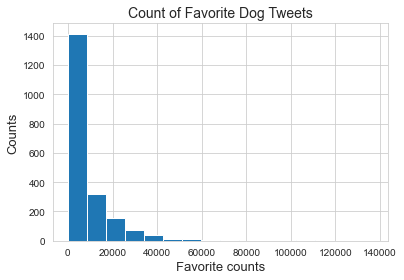

In [276]:
bins = np.arange(0, twitter_master['favorite_count'].max()+8533, 8533)
plt.hist(data = twitter_master, x = 'favorite_count', bins = bins)


plt.title("Count of Favorite Dog Tweets", fontsize = 14)
plt.xlabel('Favorite counts', fontsize = 13)
plt.ylabel('Counts', fontsize = 13)

In [268]:
twitter_master['retweet_count'].describe()

count     2043.000000
mean      2965.208517
std       5052.718754
min         16.000000
25%        634.000000
50%       1407.000000
75%       3441.500000
max      79515.000000
Name: retweet_count, dtype: float64

<AxesSubplot:xlabel='retweet_count'>

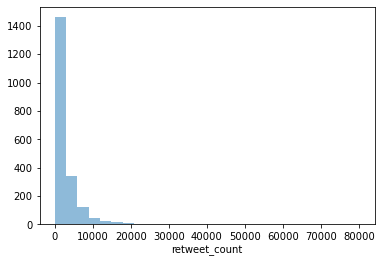

In [271]:
bin_edges = np.arange(16, twitter_master['retweet_count'].max()+2965, 2965)
sbs.distplot(twitter_master['retweet_count'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 0.5})

#### Question 4. Do favorite tweets retweet more?

<AxesSubplot:xlabel='favorite_count', ylabel='retweet_count'>

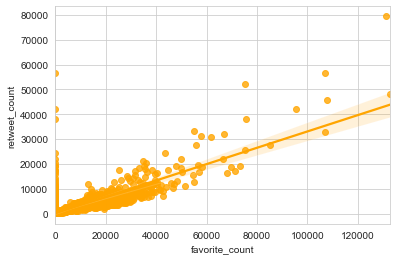

In [282]:
sbs.regplot(data = twitter_master, x = 'favorite_count', y = 'retweet_count', color = 'orange')

#### Observation 

There is a positive relationship between favorite tweets and retweets. It means that people retweet the favorite tweets. 

#### Question 5. Do favorite tweets and retweets have a relationship with the ratings of the tweets? 

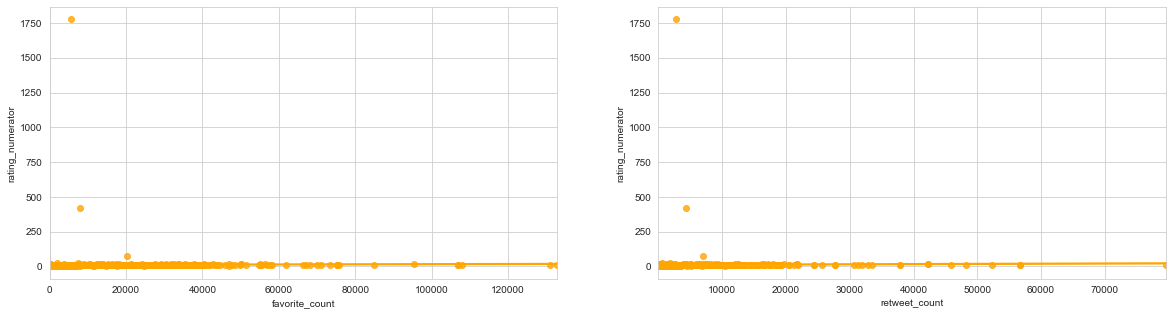

In [284]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
sbs.regplot(data = twitter_master, x = 'favorite_count', y = 'rating_numerator', color = 'orange');

# 1 row, 2 cols, subplot 2
plt.subplot(1, 2, 2) 
sbs.regplot(data = twitter_master, x = 'retweet_count', y = 'rating_numerator', color = 'orange');

#### Observation

The plots show that there is not a relationship. 